In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [ ]:
#Reading the dataset
df = pd.read_csv('adult.data',header=None,
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                        'marital-status', 'occupation', 'relationship','race','sex',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                        'income'])
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
print(df.isna().sum())
#we found that there are no missing values in the dataset.
df.shape

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


(32561, 15)

In [40]:
#REMOVE outliers
#we will remove outliers from the dataset using the z-score method.
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = np.where(z_scores > threshold)
df_cleaned = df[(z_scores < threshold).all(axis=1)]
#we will now check the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)
df_cleaned.head()

Shape of the cleaned dataset: (29828, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


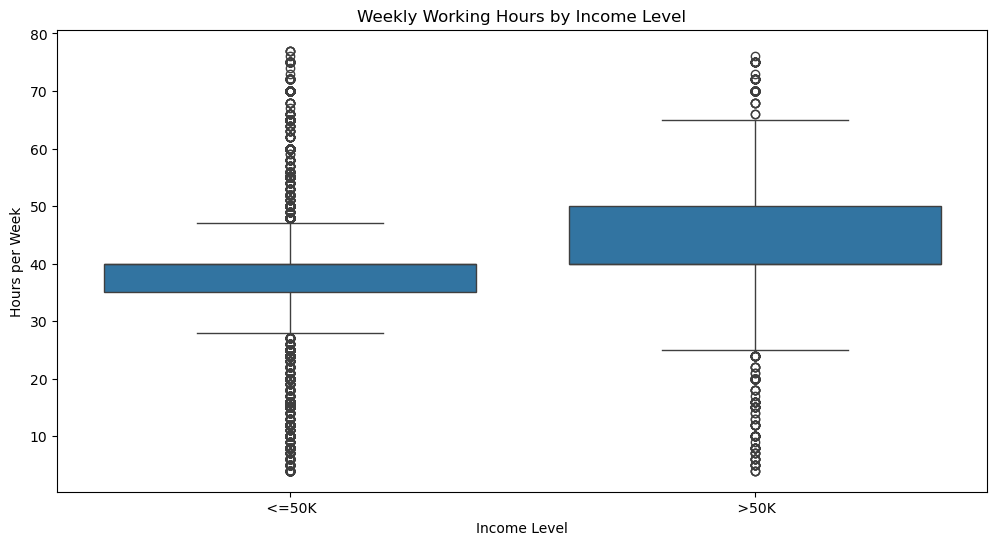

In [41]:
#Establish the importance of the weekly working hours on earning potential
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', data=df_cleaned)
plt.title('Weekly Working Hours by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.show()

**Insights:-

1.Median work hours:
-People earning >50K generally work more hours per week on average.
-The median is higher for >50K compared to <=50K.

2. Spread and Variation:
-The >50K group has a wider interquartile range (IQR), meaning more variation in weekly hours.
-The <=50K group is more tightly packed around ~40 hours.

3. Outliers:
-Both groups have a lot of outliers .
-Some people in both groups work extremely low (under 10) or very high (over 60–70) hours per week.
-Outliers are more concentrated in the <=50K group above the 50-hour range.

4. Maximum and Minimum (Whiskers):
-People earning >50K can go up to ~65 hours/week (non-outlier range).
-People earning <=50K generally don’t exceed 48 hours (without outliers).


C:\Users\EKTA\AppData\Local\Temp\ipykernel_44968\2978176666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['income'] = df_cleaned['income'].apply(lambda x: 1 if x == '>50K' else 0)


In [ ]:
#corelate the features with the target variable 'income'
df_cleaned['income'] = df_cleaned['income'].str.strip()  # remove leading/trailing spaces
df_cleaned['income'] = df_cleaned['income'].map({'>50K': 1, '<=50K': 0})
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['income'].sort_values(ascending=False)

# Showing the correlated features
print("correlated features with income:\n")
print(correlations.head(10))


correlated features with income:

income            1.000000
capital-gain      0.342534
education-num     0.318569
age               0.239370
hours-per-week    0.230619
fnlwgt           -0.009055
capital-loss     -0.016596
Name: income, dtype: float64


C:\Users\EKTA\AppData\Local\Temp\ipykernel_44968\2164631075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['income'] = df_cleaned['income'].str.strip()  # remove leading/trailing spaces
C:\Users\EKTA\AppData\Local\Temp\ipykernel_44968\2164631075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['income'] = df_cleaned['income'].map({'>50K': 1, '<=50K': 0})


**Interpretation:
-People with higher investment income are more likely to earn >50K. Strongest predictor among numeric features.
-Higher education level is strongly linked to higher income.
-Older individuals tend to earn more, likely due to experience.
-People who work more hours are more likely to earn >50K.


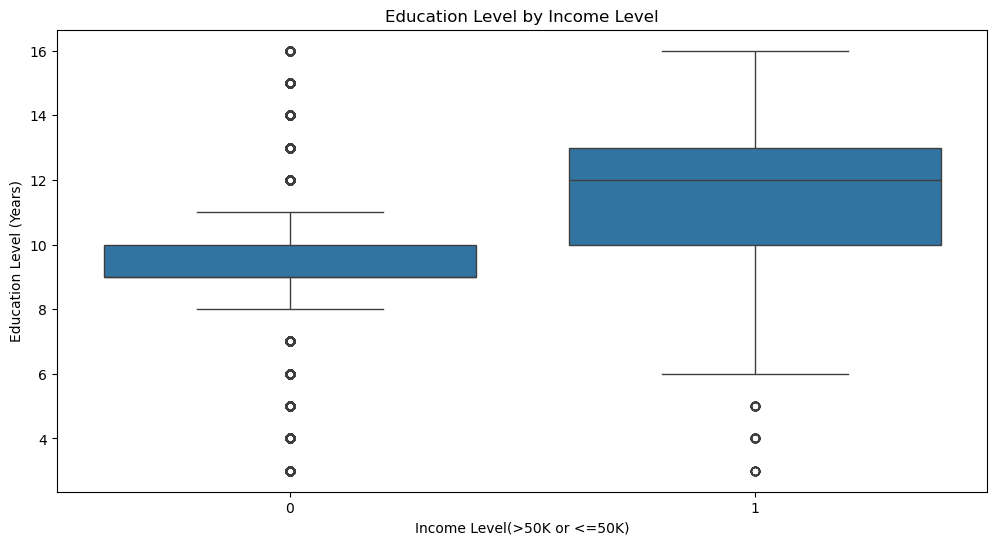

In [ ]:
#Finding the relation between the number of years spent to get the degree and earning potential
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='education-num', data=df_cleaned)
plt.title('Education Level by Income Level')
plt.xlabel('Income Level(>50K or <=50K)')      
plt.ylabel('Education Level (Years)')
plt.show()

**Insights:
->General Insight: Higher education is strongly associated with higher income. Individuals in the >50K income group typically have more years of education, while those with lower income tend to have fewer years of education.

->Median Education Level: The median education level is higher for the higher income group (1) than for the lower income group (0). This indicates that individuals earning more than 50K generally have more years of education.

->Spread and Range:
  -The lower income group (0) has a narrower interquartile range (IQR), mostly between 8 and 11 years, with a median around 9–10 years.
  -The higher income group (1) shows a wider IQR, roughly between 10 and 13 years, with a median around 12 years.
  

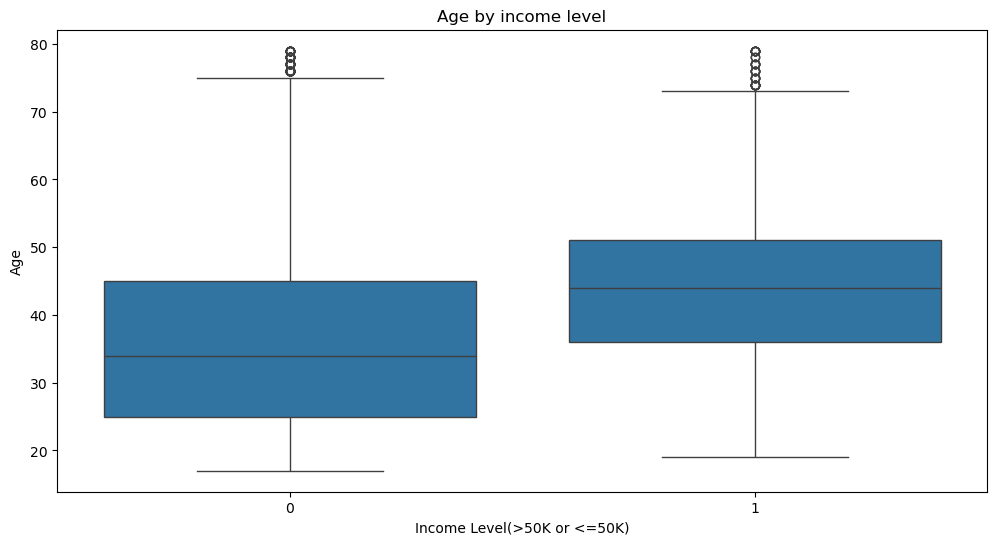

In [ ]:
#Finding the relation between the age and earning potential
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=df_cleaned)
plt.title('Age by income level')
plt.xlabel('Income Level(>50K or <=50K)')
plt.ylabel('Age')
plt.show()

**Insights:-

->General Insight: Older individuals are more likely to earn above 50K, while younger individuals are predominantly in the <=50K category.

->Median Age: 
   -The median age is higher for the higher income group (1) compared to the lower income group (0). This suggests that people with higher income tend to be older.
->Age Range:
   -The lower income group (0) has a wider spread in ages, with a lower minimum and a lower median.
   -The higher income group (1) has a higher minimum and median age, indicating that younger individuals are less represented in the higher income group.
->Interquartile Range (IQR): 
   -The IQR (box height) is slightly larger for the higher income group, indicating more variability in ages among higher earners.
